In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

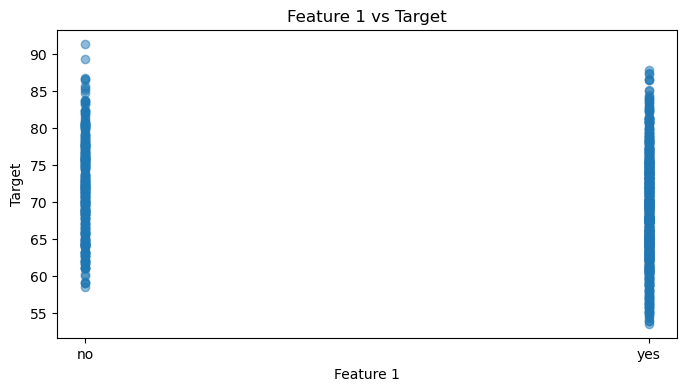

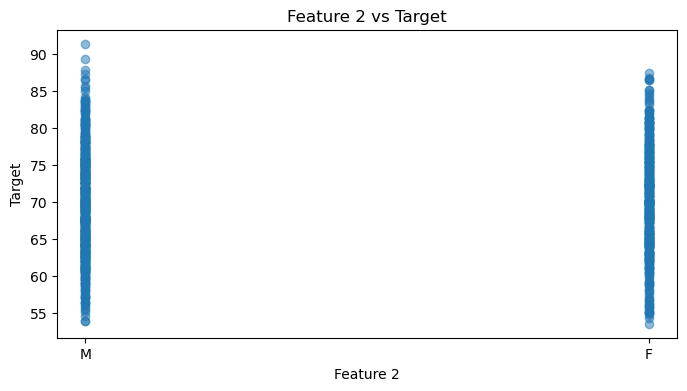

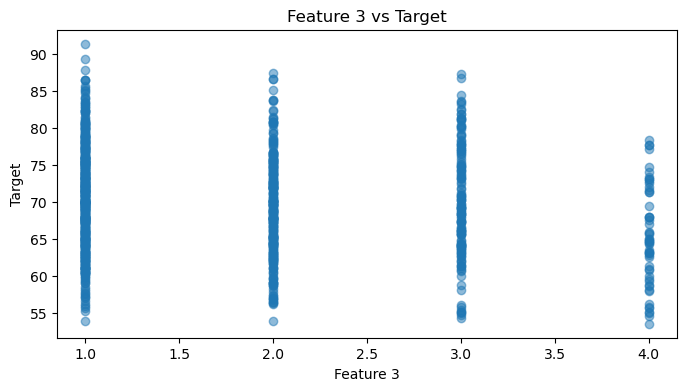

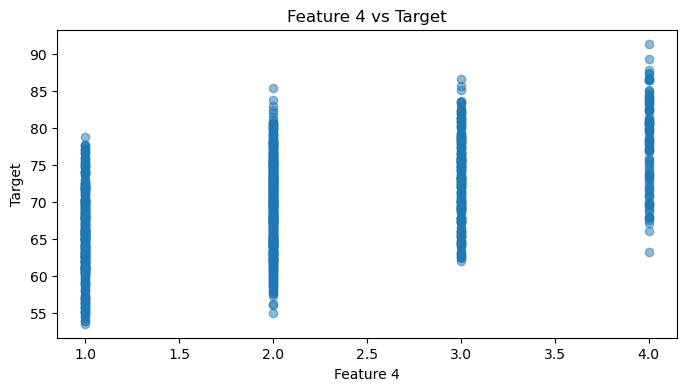

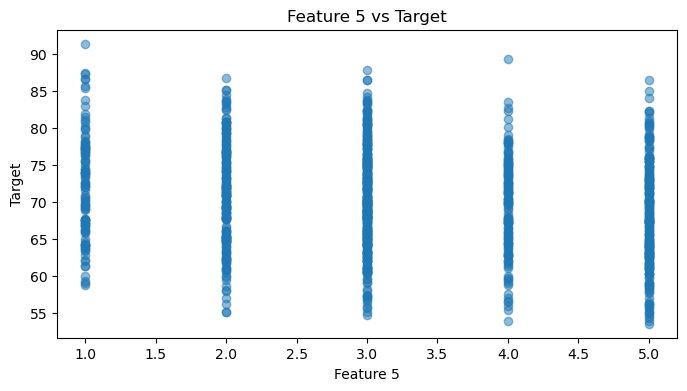

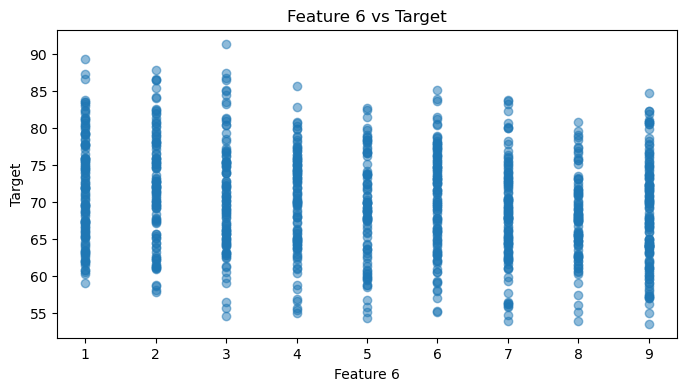

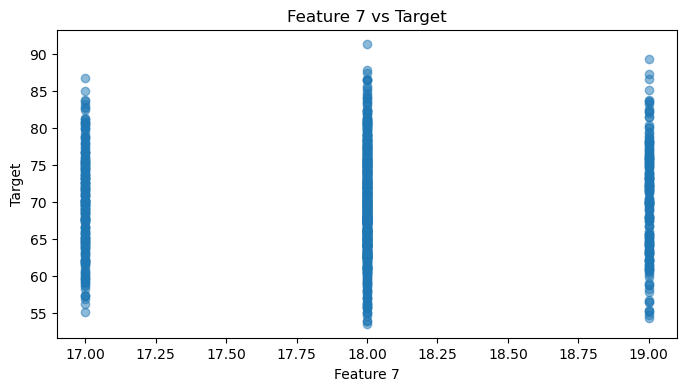

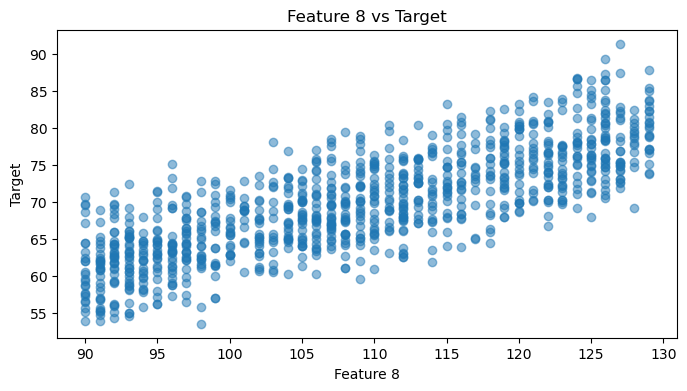

Updated x_train shape: (1000, 11)


In [2]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(r"C:\Users\rogbg\Downloads\Training data.xlsx")
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

# Try plotting y_train with different features
for i in range(x_train.shape[1]):
    plt.figure(figsize=(8, 4))
    plt.scatter(x_train[:, i], y_train, alpha=0.5)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Feature {i+1} vs Target')
    plt.show()

# Function to encode non-numeric features
def encode_features(x_train, data):
    for i in range(2):  
        if data.iloc[:, i].dtype == 'object':  
            le = LabelEncoder()
            x_train[:, i] = le.fit_transform(data.iloc[:, i])
    return x_train

# Feature engineering function
def feature_changing(x_train):
    traveltime = x_train[:, 2].astype(float)
    studytime = x_train[:, 3].astype(float)
    freetime = x_train[:, 4].astype(float)
    absences = x_train[:, 5].astype(float)
    age = x_train[:, 6].astype(float)
    iq = x_train[:, 7].astype(float)
    
    travel_free = traveltime * freetime
    iq_squared = iq ** 2
    avg_study_free_time = (studytime + freetime) / 2
    
    new_features = np.column_stack((travel_free, iq_squared, avg_study_free_time))
    
    x_train = np.hstack((x_train, new_features))
    
    return x_train


# Encode non-numeric features
x_train = encode_features(x_train, data)

# Modify features
x_train = feature_changing(x_train)

print("Updated x_train shape:", x_train.shape)

In [3]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean

In [4]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    errors = predictions - y_train
    loss = (1 / (2 * m)) * np.sum(errors ** 2)
    return loss

In [5]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, num_iterations=5000): 
    m = x_train.shape[0]
    for i in range(num_iterations):
        predictions = np.dot(x_train, w) + b
        errors = predictions - y_train
        
        dw = (1 / m) * np.dot(x_train.T, errors)
        db = (1 / m) * np.sum(errors)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
    return w, b

In [6]:
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train, y_train, w, b)) > 0.00001:
    old_cost = cost(x_train, y_train, w, b)
    w, b = gradient_descent(x_train, y_train, w, b)

# Load test data
x_predict = pd.read_excel(r"C:\Users\rogbg\Downloads\Test data.xlsx").iloc[:, :8].to_numpy()
data_predict = pd.read_excel(r"C:\Users\rogbg\Downloads\Test data.xlsx")
x_predict = encode_features(x_predict, data_predict)
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean) / x_std
ans = pd.read_excel(r"C:\Users\rogbg\Downloads\Test data.xlsx").iloc[:, 8].to_numpy()

# Make predictions
y_predict = np.dot(x_predict, w) + b

# Calculate accuracy
accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:  # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy * 100 / 200.0, 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
